In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("white")
import re
import unidecode
from scipy.stats import norm
from scipy import stats

%matplotlib inline

In [3]:
colspecs, names, codes = [], [], []
codes_names = {'code': [], 'name': []}

with open('input_vars_PES2015.txt') as f:
    for l in f:
        c = l.rstrip().split()

        #colspec
        pos = int(c[0][1:])
        size = int(c[2].replace('.', '').replace('$', ''))
        colspecs.append((pos - 1, pos - 1 + size))
        
        # names
        name = unidecode.unidecode('_'.join(c[3:])[2:-2]).lower().replace(',','')
        names.append(name)
        
        #codes
        codes.append(c[1])
        
        codes_names['code'].append(c[1])
        codes_names['name'].append(name)
        
codes_names['colspecs'] = colspecs
codes_names = pd.DataFrame(codes_names)

In [55]:
codes_names.head()

,code,colspecs,name
0,V0101,"(0, 4)",ano_de_referencia
1,UF,"(4, 6)",unidade_da_federacao
2,V0102,"(4, 12)",numero_de_controle
3,V0103,"(12, 15)",numero_de_serie
4,V0301,"(15, 17)",numero_de_ordem


In [46]:
for ind, row in codes_names.iterrows():#.sample(5)
    print('Code: {} :: Nome: {}'.format(row.code, row['name']))

Code: V0101 :: Nome: ano_de_referencia
Code: UF :: Nome: unidade_da_federacao
Code: V0102 :: Nome: numero_de_controle
Code: V0103 :: Nome: numero_de_serie
Code: V0301 :: Nome: numero_de_ordem
Code: V0302 :: Nome: sexo
Code: V3031 :: Nome: dia_de_nascimento
Code: V3032 :: Nome: mes_de_nascimento
Code: V3033 :: Nome: ano_de_nascimento
Code: V8005 :: Nome: idade_do_morador_na_data_de_referencia
Code: V0401 :: Nome: condicao_na_unidade_domiciliar
Code: V0402 :: Nome: condicao_na_familia
Code: V0403 :: Nome: numero_da_familia
Code: V0404 :: Nome: cor_ou_raca
Code: V0405 :: Nome: tem_mae_viva
Code: V0406 :: Nome: mae_mora_no_domicilio
Code: V0407 :: Nome: numero_de_ordem_da_mae_
Code: V0408 :: Nome: tem_registro_de_nascimento
Code: V4111 :: Nome: vive_em_companhia_de_conjuge_ou_companheiro(a)
Code: V4112 :: Nome: natureza_da_uniao
Code: V4011 :: Nome: estado_civil
Code: V0412 :: Nome: o_informante_desta_parte_foi
Code: V0501 :: Nome: nasceu_no_municipio_de_residencia
Code: V0502 :: Nome: nas

In [16]:
%%time
data = pd.read_fwf('PES2015.txt', colspecs=colspecs, names=codes, dtype={'V9906': str, 'V9907': str})

Wall time: 1min 38s


In [24]:
%%time
data.to_csv("pes2015_data.csv", index=False, encoding='utf-8')

In [25]:
data['agric'] = ~data['V9008'].isnull()

In [40]:
ct = pd.crosstab(columns=data['agric'], index=data['V061113'], margins=True)
ct/ct.loc['All']

agric,False,True,All
V061113,,,
1.0,0.882357,0.779626,0.880147
2.0,0.117643,0.220374,0.119853
All,1.000000,1.000000,1.000000


In [54]:
data[['V4742', 'V4750']]#.value_counts(dropna=False)

,V4742,V4750
0,8.000000e+02,8.000000e+02
1,1.150000e+03,1.150000e+03
2,7.930000e+02,7.930000e+02
3,7.930000e+02,7.930000e+02
4,7.930000e+02,7.930000e+02
5,7.930000e+02,7.930000e+02
6,7.930000e+02,7.930000e+02
7,7.930000e+02,7.930000e+02
8,2.900000e+03,2.900000e+03
9,2.900000e+03,2.900000e+03


In [37]:
data['V9907'].value_counts()

nan      191711
45999     14995
95000     11065
55030      7023
80011      6730
53030      6395
75013      4271
01201      4041
85012      3768
53042      3627
60031      3484
50020      3379
60040      3333
85011      3247
93020      3216
74011      2866
01205      2570
80012      2544
01108      2419
53070      2414
53101      2106
18001      1963
75016      1928
01102      1863
53063      1852
15043      1823
53050      1739
01110      1737
74050      1652
53061      1539
          ...  
60020        30
53112        27
16000        26
92012        25
35030        25
05002        23
33004        22
15042        22
14003        21
01206        20
34003        20
33003        19
40020        17
01118        15
33002        15
35020        14
99000        12
01103        12
14002        11
45005        11
02002         8
01500         7
33005         6
10000         6
60092         4
01104         3
23030         2
01207         2
12000         2
53067         1
Name: V9907, Length: 209

In [190]:
lens = []
with open('PES2015.txt') as f:
    for i, l in enumerate(f):
        lens.append(len(l))

In [134]:
data[data['V4719'] == data['V4719'].max()]['V4719'].describe()

count    2.194000e+03
mean     1.000000e+12
std      0.000000e+00
min      1.000000e+12
25%      1.000000e+12
50%      1.000000e+12
75%      1.000000e+12
max      1.000000e+12
Name: V4719, dtype: float64

In [135]:
data.to_csv("pes2015_data.csv", index=False, encoding='utf-8')

In [213]:
%%time
data = pd.read_csv('pes2015_data.csv')

Wall time: 22 s


In [22]:
data = data.sample(frac=0.3, random_state=0)

In [23]:
data.to_csv("pes2015_data_sample.csv", index=False, encoding='utf-8')

In [194]:
%%time
data = pd.read_csv('pes2015_data_sample.csv')

Wall time: 4.34 s


In [195]:
data10 = data[data['V8005'] >= 10]
data9 = data[data['V8005'] < 10]

In [202]:
(data10["V061113"].isnull()).mean()

0.41354535255027186

In [206]:
(data10[~data10["V061113"].isnull()]["V061113"] == 1).mean()

0.88201317096501231

In [208]:
data10[data10['V06111'].isnull()]

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V3628,V3629,V3630,V3631,V3632,V3633,V3634,V3637,V3638,V9993


In [209]:
data10['V06111'].value_counts(dropna=False) 

1.0    53216
3.0    39480
Name: V06111, dtype: int64

In [215]:
data10[data10['V061111'] == 1]['V061113'].value_counts(dropna=False) 

1.0    743
2.0    403
Name: V061113, dtype: int64

In [220]:
codes_names[codes_names['code'].str.startswith('V4')]

,code,colspecs,name
18,V4111,"(38, 39)",vive_em_companhia_de_conjuge_ou_companheiro(a)
19,V4112,"(39, 40)",natureza_da_uniao
20,V4011,"(40, 41)",estado_civil
323,V4801,"(698, 700)",nivel_de_ensino_duracao_do_ensino_fundamental_...
324,V4802,"(700, 702)",nivel_de_ensino_e_grupos_de_series_do_ensino_f...
325,V4803,"(702, 704)",anos_de_estudo_(todas_as_pessoas)
326,V4704,"(704, 705)",condicao_de_atividade
327,V4805,"(705, 706)",condicao_de_ocupacao_no_periodo_de_referencia_...
328,V4706,"(706, 708)",posicao_na_ocupacao_no_trabalho_principal
329,V4707,"(708, 709)",horas_habitualmente_trabalhadas_por_semana_em_...


In [179]:
data9.shape

(14375, 435)

In [177]:
(data10["V061113"] == 1).mean()

0.51726072322430305

In [178]:
(data9["V061113"] == 1).mean()

0.0

In [180]:
data9["V061113"].value_counts()

Series([], Name: V061113, dtype: int64)

In [149]:
ct = pd.crosstab(index=data["V061113"], columns=data["V06112"], margins=True)
ct
ct/ct.loc["All"]

V06112,1.0,3.0,All
V061113,,,
1.0,0.908414,0.490835,0.882013
2.0,0.091586,0.509165,0.117987
All,1.000000,1.000000,1.000000


In [171]:
(~data['V8006']).sum()# = data['V8005'] >= 10

14375

In [225]:
data10['V9906']

0            NaN
1         4110.0
2            NaN
3         5161.0
4         2321.0
5         9144.0
6            NaN
7         5161.0
8         5174.0
9         8493.0
10           NaN
11        5132.0
12        3172.0
13           NaN
14        2422.0
15           NaN
16        5142.0
17        7632.0
18           NaN
19           NaN
20           NaN
21        7823.0
22        9542.0
23        6229.0
24        2394.0
25        6229.0
27        5132.0
28           NaN
29        5211.0
30        3141.0
           ...  
107032    4211.0
107033    7244.0
107034       NaN
107035       NaN
107036       NaN
107037    5243.0
107038       NaN
107040    4102.0
107041       NaN
107042    7152.0
107043       NaN
107044       NaN
107046       NaN
107047     100.0
107048    4223.0
107050       NaN
107053    6239.0
107054    4123.0
107055    2523.0
107056    7163.0
107059    6139.0
107061    6410.0
107062       NaN
107063    7825.0
107064       NaN
107065       NaN
107066       NaN
107067    4141

In [168]:
ct = pd.crosstab(index=data["V061113"], columns=data['V8006'], margins=True)
ct#/ct.loc["All"]

V8006,True,All
V061113,,
1.0,47948,47948
2.0,6414,6414
All,54362,54362


In [52]:
data['V4719'].isnull().mean()

0.5363637212690644

In [53]:
data['V4719'].shape

(107071,)

In [54]:
data = data[(data['V4719'] != data['V4719'].max()) & (data['V4719'] != 0) & (~data['V4719'].isnull())]

In [55]:
data.shape

(45860, 435)

In [56]:
data['V4719'].describe()

count     45860.000000
mean       1824.364959
std        2741.513581
min           6.000000
25%         788.000000
50%        1109.000000
75%        2000.000000
max      120000.000000
Name: V4719, dtype: float64

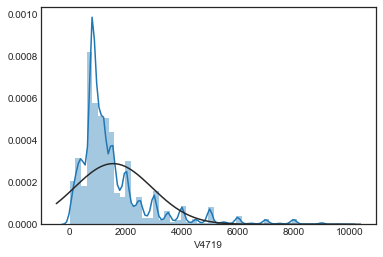

In [71]:
sns.distplot(data[data['V4719'] < 10000]['V4719'], fit=norm)

In [61]:
data['V4719'].skew()

10.737112963628183

In [65]:
data['V4719'].kurt()

257.86272356060789

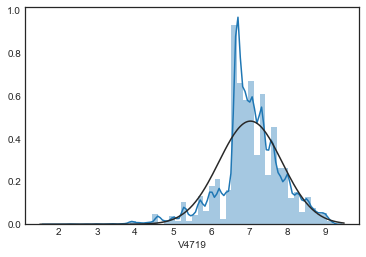

In [93]:
sns.distplot(np.log(data[data['V4719'] < 10000]['V4719']), fit=norm)

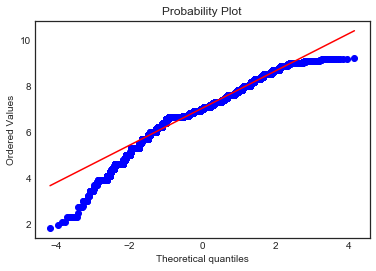

In [92]:
fig = plt.figure()
res = stats.probplot((np.log(data[data['V4719'] < 10000]['V4719'])), plot=plt)

In [94]:
np.log(data[data['V4719'] < 10000]['V4719']).skew()

-0.54332794705044507

In [95]:
np.log(data[data['V4719'] < 10000]['V4719']).kurt()

1.9529993013970941

In [98]:
(data['V06111'] == 1).mean()

0.65739206279982554

In [130]:
(data['V061113'] == 1).mean()

0.60608373310074137

In [105]:
(data[data['V06111'] == 1]['V061113'] == 1).mean()

0.90944672946795813

In [122]:
internet = data[data['V06111'] == 1]
internet_means = internet[['V061112', 'V061113', 'V061114', 'V061115', 'V061116']]

In [127]:
internet_means[internet_means[['V061112', 'V061113', 'V061114', 'V061115', 'V061116']] == 2]  = 0

C:\Users\pfcor\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\pfcor\Anaconda3\lib\site-packages\pandas\core\frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [129]:
internet_means.mean()

V061112    0.707012
V061113    0.909447
V061114    0.160110
V061115    0.057815
V061116    0.005108
dtype: float64

In [118]:
internet[internet[['V061112', 'V061113', 'V061114', 'V061115', 'V061116']] == 2] = 0

C:\Users\pfcor\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ValueError: Boolean array expected for the condition, not float64

In [115]:
pd.crosstab(index=internet["V061112"], columns=internet["V061113"])

V061113,1.0,2.0
V061112,,
1.0,18747,2568
2.0,8671,162


In [48]:
(data['V4719'] < 10000).mean()

0.98194149370812223

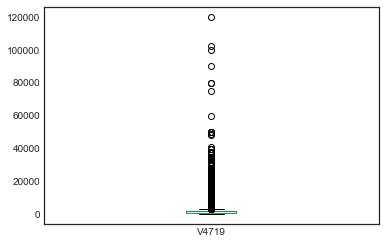

In [36]:
data['V4719'].plot.box()

In [37]:
Q1 = data['V4719'].quantile(0.25)
Q3 = data['V4719'].quantile(0.75)
IQR = Q3 - Q1

In [43]:
Q3 + 1.5 * IQR

3318.0

In [39]:
((data['V4719'] < (Q1 - 1.5 * IQR)) | (data['V4719'] > (Q3 + 1.5 * IQR))).sum()

5004

In [42]:
data[~((data['V4719'] < (Q1 - 1.5 * IQR)) | (data['V4719'] > (Q3 + 1.5 * IQR)))]['V4719'].describe()

count    43948.000000
mean      1106.963161
std        732.309487
min          0.000000
25%        700.000000
50%       1000.000000
75%       1500.000000
max       3315.000000
Name: V4719, dtype: float64

In [11]:
data2 = data[data['V4719'] != data['V4719'].max()]

In [14]:
data2 = data2[data2['V4719'] != 0]

In [15]:
data2['V4719'].skew()#.plot.box()

15.322280386906257

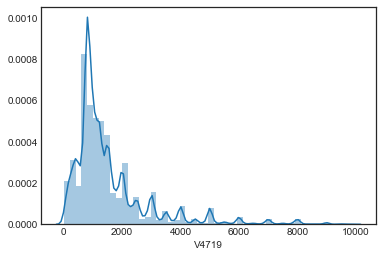

In [16]:
sns.distplot(data2[(~data2['V4719'].isnull()) & (data2['V4719'] < 10000)]['V4719'])

In [17]:
data2['V4719log'] = np.log(data2['V4719'])

In [19]:
data2['V4719'].shape

(137746,)

ValueError: cannot convert float NaN to integer

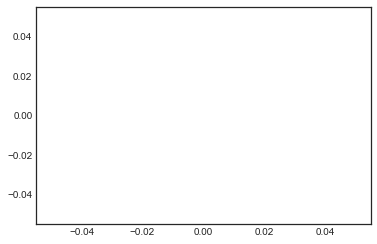

In [18]:
sns.distplot(data2['V4719log'])

In [142]:
data['V061113'].unique()

array([  1.,   2.,  nan])

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [155]:
data['V061113'].mean()

1.1198534879237696

In [81]:
for col in data.columns:
    print(col, ':', codes_dict[col])
    print('---')#, list(data[col][:5]))

V0101 : ano_de_referencia
---
UF : unidade_da_federacao
---
V0102 : numero_de_controle
---
V0103 : numero_de_serie
---
V0301 : numero_de_ordem
---
V0302 : sexo
---
V3031 : dia_de_nascimento
---
V3032 : mes_de_nascimento
---
V3033 : ano_de_nascimento
---
V8005 : idade_do_morador_na_data_de_referencia
---
V0401 : condicao_na_unidade_domiciliar
---
V0402 : condicao_na_familia
---
V0403 : numero_da_familia
---
V0404 : cor_ou_raca
---
V0405 : tem_mae_viva
---
V0406 : mae_mora_no_domicilio
---
V0407 : numero_de_ordem_da_mae_
---
V0408 : tem_registro_de_nascimento
---
V4111 : vive_em_companhia_de_conjuge_ou_companheiro(a)
---
V4112 : natureza_da_uniao
---
V4011 : estado_civil
---
V0412 : o_informante_desta_parte_foi
---
V0501 : nasceu_no_municipio_de_residencia
---
V0502 : nasceu_na_unidade_da_federacao_de_residencia
---
V5030 : lugar_de_nascimento
---
V0504 : morou_em_outra_unidade_da_federacao_ou_pais_estrangeiro
---
V0505 : morava_na_unidade_da_federacao_na_data_de_referencia_
---
V5061 : 

V4713 : condicao_de_atividade_no_trabalho_principal_do_periodo_de_referencia_de_365_dias
---
V4814 : condicao_de_ocupacao_no_periodo_de_referencia_de_365_dias
---
V4715 : posicao_na_ocupacao_no_trabalho_principal_do_periodo_de_referencia_de_365_dias
---
V4816 : grupamentos_de_atividade_no_trabalho_principal_do_periodo_de_referencia_de_365_dias
---
V4817 : grupamentos_ocupacionais_do_trabalho_principal_do_periodo_de_referencia_de_365_dias
---
V4718 : rendimento_mensal_do_trabalho_principal_para_pessoas_de_10_anos_ou_mais_de_idade
---
V4719 : rendimento_mensal_de_todos_os_trabalhos_para_pessoas_de_10_anos_ou_mais_de_idade
---
V4720 : rendimento_mensal_de_todas_as_fontes_para_pessoas_de_10_anos_ou_mais_de_idade
---
V4721 : rendimento_mensal_domiciliar
---
V4722 : rendimento_mensal_familiar_
---
V4723 : tipo_de_familia
---
V4724 : numero_de_componentes_da_familia_
---
V4727 : codigo_de_area_censitaria
---
V4728 : codigo_de_situacao_censitaria
---
V4729 : peso_da_pessoa
---
V4732 : peso_da_

In [113]:
pd.DataFrame({'colspecs': colspecs, 'names': names

[(0, 4),
 (4, 6),
 (4, 12),
 (12, 15),
 (15, 17),
 (17, 18),
 (18, 20),
 (20, 22),
 (22, 26),
 (26, 29),
 (29, 30),
 (30, 31),
 (31, 32),
 (32, 33),
 (33, 34),
 (34, 35),
 (35, 37),
 (37, 38),
 (38, 39),
 (39, 40),
 (40, 41),
 (41, 42),
 (42, 43),
 (43, 44),
 (44, 46),
 (46, 47),
 (47, 48),
 (48, 49),
 (49, 50),
 (50, 51),
 (51, 52),
 (52, 53),
 (53, 54),
 (54, 56),
 (56, 58),
 (58, 59),
 (59, 60),
 (60, 61),
 (61, 62),
 (62, 63),
 (63, 64),
 (64, 65),
 (65, 66),
 (66, 67),
 (67, 68),
 (68, 69),
 (69, 70),
 (70, 72),
 (72, 73),
 (73, 74),
 (74, 75),
 (75, 76),
 (76, 78),
 (78, 79),
 (79, 80),
 (80, 81),
 (81, 82),
 (82, 83),
 (83, 84),
 (84, 85),
 (85, 86),
 (86, 87),
 (87, 88),
 (88, 89),
 (89, 90),
 (90, 91),
 (91, 92),
 (92, 93),
 (93, 94),
 (94, 95),
 (95, 96),
 (96, 97),
 (97, 101),
 (101, 106),
 (106, 107),
 (107, 111),
 (111, 116),
 (116, 117),
 (117, 118),
 (118, 119),
 (130, 131),
 (131, 132),
 (143, 144),
 (144, 145),
 (145, 147),
 (147, 148),
 (148, 150),
 (150, 151),
 (151,

In [ ]:
features = [
    'unidade_da_federacao',
    'sexo',
    'idade_do_morador_na_data_de_referencia',
    'condicao_na_unidade_domiciliar',
    'cor_ou_raca',
    'tem_registro_de_nascimento',
    'vive_em_companhia_de_conjuge_ou_companheiro(a)',
    'estado_civil',
    'lugar_de_nascimento',
    'morou_em_outra_unidade_da_federacao_ou_pais_estrangeiro',
    'sabe_ler_e_escrever',
    'frequenta_escola_ou_creche',
    'rede_de_ensino',
    'curso_que_frequenta',
    'anteriormente_frequentou_escola_ou_creche',
    'curso_mais_elevado_que_frequentou_anteriormente',
    'concluiu_este_curso_que_frequentou_anteriormente',
    'nos_ultimos_tres_meses,_utilizou_a_internet_em_algum_local',
    'o_acesso_a_internet_foi_feito_atraves_de_microcomputador',
    'o_acesso_a_internet_foi_feito_atraves_de_telefone_celular',
    'o_acesso_a_internet_foi_feito_atraves_de_tablet',
    'o_acesso_a_internet_foi_feito_atraves_de_tv',
    'tem_telefone_movel_celular_para_uso_pessoal',
    
    
    
]

In [86]:
codes_names[codes_names['name'] == 'idade_do_morador_na_data_de_referencia']

,code,name
9,V8005,idade_do_morador_na_data_de_referencia


In [87]:
data.V8005.describe()

count    356904.000000
mean         34.106043
std          21.154838
min           0.000000
25%          17.000000
50%          32.000000
75%          50.000000
max         115.000000
Name: V8005, dtype: float64

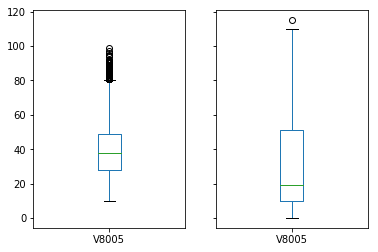

In [92]:
fig, ax = plt.subplots(1, 2, sharey=True)
data[data.V4719 == 0]['V8005'].plot.box(ax=ax[0])
data[data.V4719 != 0]['V8005'].plot.box(ax=ax[1])

C:\Users\pfcor\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


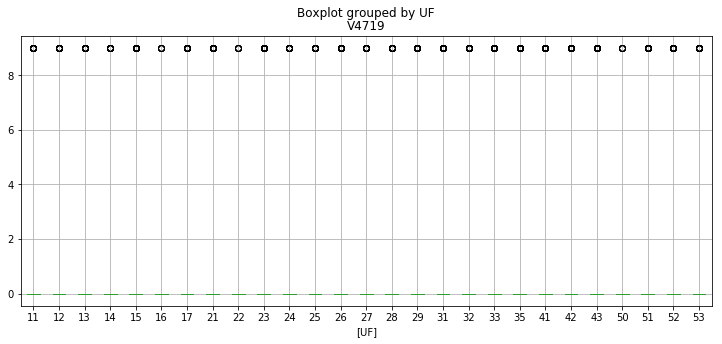

In [97]:
data[['V4719', 'UF']].boxplot(by='UF', figsize=(12,5))

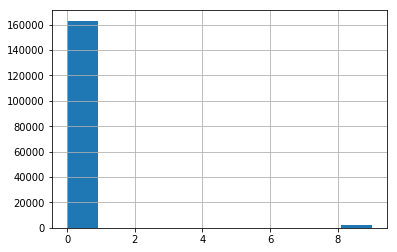

In [98]:
data['V4719'].hist()

In [109]:
data2 = data[data['V4719'] <= 2]

In [111]:
data2.head()#V4719.describe()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V3628,V3629,V3630,V3631,V3632,V3633,V3634,V3637,V3638,V9993
0,2015,11,11000015,1,1,2,27,2,1992,23,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,333.0,634.0,20170511
1,2015,11,11000015,3,1,4,4,5,1992,23,...,2.0,NaN,2.0,NaN,1.0,NaN,2.0,333.0,470.0,20170511
2,2015,11,11000015,4,1,4,4,1,1980,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
3,2015,11,11000015,4,2,2,5,6,1981,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
7,2015,11,11000015,4,6,4,8,9,1997,18,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1000.0,1410.0,20170511


In [112]:
data.V4719.value_counts()

0.0    162999
9.0      2194
Name: V4719, dtype: int64

In [72]:
codes_dict['V4719'].describe()

AttributeError: 'str' object has no attribute 'describe'

In [44]:
data_read = pd.read_csv("pes2015_data.csv", usecols=['dia_de_nascimento','mes_de_nascimento','ano_de_nascimento','idade_do_morador_na_data_de_referencia'])

In [47]:
data_read[data_read['mes_de_nascimento'] == 20].head(100)

,dia_de_nascimento,mes_de_nascimento,ano_de_nascimento,idade_do_morador_na_data_de_referencia
36,0,20,45,45
54,0,20,35,35
70,0,20,42,42
137,0,20,31,31
156,0,20,22,22
309,0,20,48,48
339,0,20,48,48
389,0,20,31,31
393,0,20,30,30
408,0,20,31,31


In [39]:
data_read = pd.read_csv("pes2015_data.csv", usecols=['ano_de_referencia', 'unidade_da_federacao'])

In [48]:
data.head()

,ano_de_referencia,unidade_da_federacao,numero_de_controle,numero_de_serie,numero_de_ordem,sexo,dia_de_nascimento,mes_de_nascimento,ano_de_nascimento,idade_do_morador_na_data_de_referencia,...,"nesse_periodo,_praticou_essa_principal_atividade_fisica_como_representante_ou_filiado_a_alguma_instituicao",essa_instituicao_era.1,"nesse_periodo,_participou_de_alguma_competicao_dessa_principal_atividade_fisica",o_nivel_dessa_competicao_foi.1,"em_sua_opiniao,_o_poder_publico_deveria_investir_no_desenvolvimento_de_atividades_fisicas_ou_esportivas_na_vizinhanca_em_que_reside","em_sua_opiniao,_em_que_o_poder_publico_deveria_investir_primeiramente_na_vizinhanca_em_que_reside","esse_investimento,_na_vizinhanca_em_que_reside,_deveria_ser_primeiramente",peso_do_morador_selecionado_para_o_suplemento_de_praticas_de_esporte_e_atividade_fisica_sem_ajuste_pela_projecao_de_populacao,peso_do_morador_selecionado_para_o_suplemento_de_praticas_de_esporte_e_atividade_fisica_com_ajuste_pela_projecao_de_populacao_-_usado_no_calculo_de_indicadores_de_morador_selecionado,data_de_geracao_do_arquivo_de_microdados
0,2015,11,11000015,1,1,2,27,2,1992,23,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,333.0,634.0,20170511
1,2015,11,11000015,3,1,4,4,5,1992,23,...,2.0,NaN,2.0,NaN,1.0,NaN,2.0,333.0,470.0,20170511
2,2015,11,11000015,4,1,4,4,1,1980,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
3,2015,11,11000015,4,2,2,5,6,1981,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
4,2015,11,11000015,4,3,4,8,4,2004,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511


In [26]:
data_sample = pd.read_fwf('PES2015_sample.txt', colspecs=colspecs, names=names)

In [29]:
for col in data_sample.columns:
    print(unidecode.unidecode(col))

Ano_de_referencia
Unidade_da_Federacao
Numero_de_controle
Numero_de_serie
Numero_de_ordem
Sexo
Dia_de_nascimento
Mes_de_nascimento
Ano_de_nascimento
Idade_do_morador_na_data_de_referencia
Condicao_na_unidade_domiciliar
Condicao_na_familia
Numero_da_familia
Cor_ou_raca
Tem_mae_viva
Mae_mora_no_domicilio
Numero_de_ordem_da_mae_
Tem_registro_de_nascimento
Vive_em_companhia_de_conjuge_ou_companheiro(a)
Natureza_da_uniao
Estado_civil
O_informante_desta_parte_foi
Nasceu_no_municipio_de_residencia
Nasceu_na_Unidade_da_Federacao_de_residencia
Lugar_de_nascimento
Morou_em_outra_Unidade_da_Federacao_ou_pais_estrangeiro
Morava_na_Unidade_da_Federacao_na_data_de_referencia_
Tinha_ate_4_anos_ininterruptos_de_residencia_na_Unidade_da_Federacao
Tempo_de_residencia_na_Unidade_da_Federacao_(ate_4_anos)
Tinha_de_5_a_9_anos_ininterruptos_de_residencia_na_Unidade_da_Federacao
Tempo_de_residencia_na_Unidade_da_Federacao_(de_5_a_9_anos)
Tinha_10_anos_ou_mais_de_residencia_na_Unidade_da_Federacao
Morava_na_U